In [55]:
# SVR

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [56]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [57]:
# Feature Scaling
import warnings
warnings.filterwarnings("ignore") 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))


In [58]:
# Fitting linear regression
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
regressorpoly = PolynomialFeatures(degree=3)
X_poly = regressorpoly.fit_transform(X)

regressorpoly = LinearRegression()
regressorpoly.fit(X_poly,y)


# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressorRF = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressorRF.fit(X, y)
lin2 = LinearRegression()
lin2.fit(X_poly,y)

    
from sklearn.tree import DecisionTreeRegressor
    
regressorDT = DecisionTreeRegressor(random_state = 0)
regressorDT.fit(X, y)


# Fitting SVR to the dataset
from sklearn.svm import SVR
regressorSVR = SVR(kernel = 'rbf')
regressorSVR.fit(X, y)

#y_pred=sc_y.inverse_transform(regressor.predict(sc_X.transform(np.reshape((6.5),(1,-1)))))

# Predicting a new result

#y_predpoly = sc_y.inverse_transform(regressorpoly.predict(sc_X.transform(np.reshape((6.5),(1,-1)))))
y_predRF = sc_y.inverse_transform(regressorRF.predict(sc_X.transform(np.reshape((6.5),(1,-1)))))
y_predDT = sc_y.inverse_transform(regressorDT.predict(sc_X.transform(np.reshape((6.5),(1,-1)))))
y_predSVR = sc_y.inverse_transform(regressorSVR.predict(sc_X.transform(np.reshape((6.5),(1,-1)))))

#print('Poly =',y_predpoly)
print('RF =',y_predRF)
print('DT =',y_predDT)
print('SVR =',y_predSVR)




RF = [210000.]
DT = [200000.]
SVR = [170370.0204065]


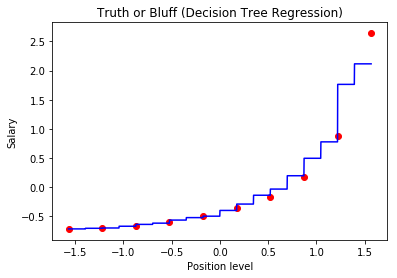

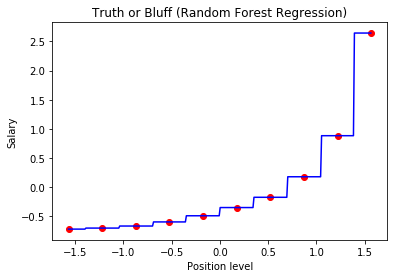

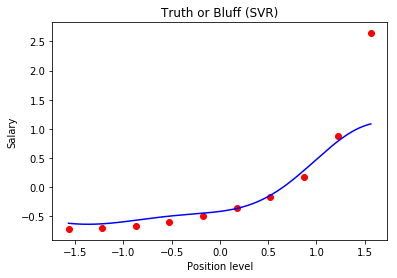

In [59]:
# Visualization-the non-linear regression
#plt.scatter(X,y, color='red')
#plt.plot(X,poly_regressor.predict(lin2.fit_tranform(X)), color ='blue')
#plt.title('Truth or Bluff (Linear Regression)')
#plt.xlabel('Position Level')
#plt.ylabel('Salary')

# Visualising the Decision Tree Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.001)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressorRF.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the Random Forest Regression results (higher resolution)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressorDT.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Visualising the SVR results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01) # choice of 0.01 instead of 0.1 step because the data is feature scaled
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressorSVR.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()